In [1]:
import numpy as np
import pandas as pd

In [2]:
Data = pd.read_csv("C:/Users/nxt-1/Desktop/Dataset/data_telco_customer_churn.csv")

In [3]:
Data.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [4]:
Data.shape

(4930, 11)

In [5]:
Data.dtypes

Dependents           object
tenure                int64
OnlineSecurity       object
OnlineBackup         object
InternetService      object
DeviceProtection     object
TechSupport          object
Contract             object
PaperlessBilling     object
MonthlyCharges      float64
Churn                object
dtype: object

In [6]:
Data.isnull().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

In [7]:
Data.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [8]:
Data["PaperlessBilling"].value_counts()

PaperlessBilling
Yes    2957
No     1973
Name: count, dtype: int64

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sea

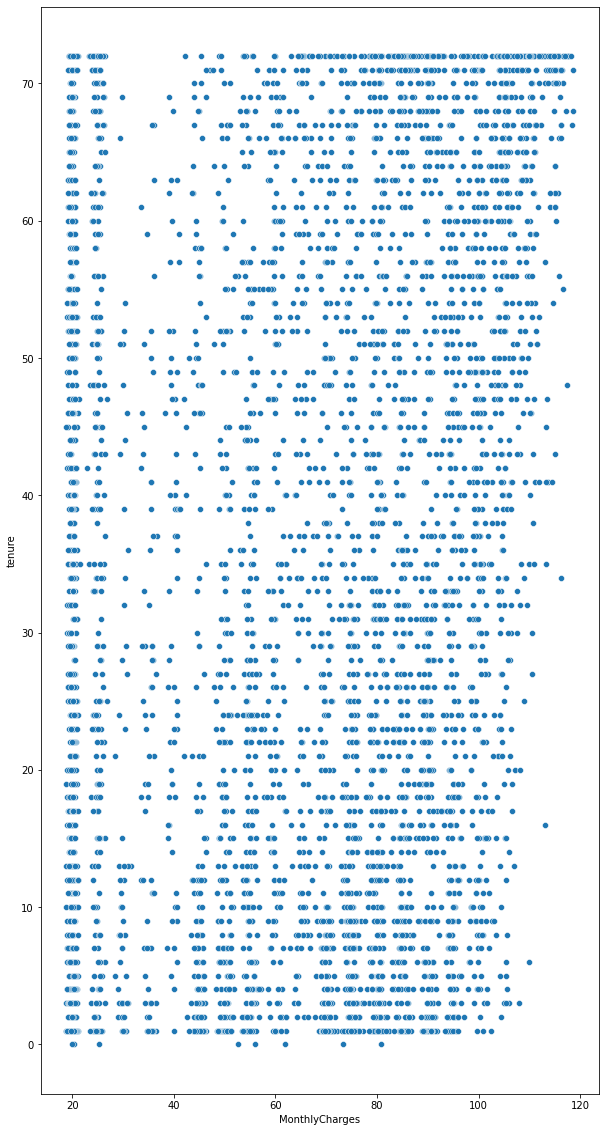

In [12]:
plt.figure(figsize=(10,20))
sea.scatterplot(data=Data,x='MonthlyCharges',y="tenure")
plt.show()

In [9]:
Data["Dependents_Type"] = Data["Dependents"].map({"Yes" : 1 , "No" : 0})
Data["OnlineBackup_Type"] = Data["OnlineBackup"].map({"Yes" : 2 , "No" : 1 , "No internet service" : 0})
Data["OnlineBackup_Type"] = Data["OnlineBackup"].map({"Yes" : 2 , "No" : 1, "No internet service" : 0})
Data["InternetService_Type"] = Data["InternetService"].map({"Fiber optic" : 2, "DSL" : 1 , "No" : 0})
Data["DeviceProtection_Type"] = Data["DeviceProtection"].map({"Yes" : 2 , "No" : 1, "No internet service" : 0})
Data["TechSupport_Type"] = Data["TechSupport"].map({"Yes" : 2 , "No" : 1, "No internet service" : 0})
Data["Contract_Type"] = Data["Contract"].map({"Month-to-month" :0 , "Two year" : 2,"One year" : 1})
Data["PaperlessBilling_Type"] = Data["PaperlessBilling"].map({"Yes" : 1 , "No" : 0})
Data["Churn_Type"]  = Data["Churn"].map({"Yes" : 1 , "No" : 0})

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [11]:
Features = ['Dependents_Type',
       'OnlineBackup_Type', "tenure","MonthlyCharges",'InternetService_Type', 'DeviceProtection_Type',
       'TechSupport_Type', 'Contract_Type', 'PaperlessBilling_Type',]
X= Data[Features]
y = Data["Churn_Type"]

In [12]:
SD = StandardScaler()

In [13]:
new_x = SD.fit_transform(X)

In [16]:
new_x.shape

(4930, 9)

In [29]:
new_y = np.array(y)

In [34]:
from lazypredict.Supervised import LazyClassifier
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=100)
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models,pred = clf.fit(x_train,x_test,y_train,y_test)
models.sort_values(by="Accuracy",ascending=False)[:5]

  0%|          | 0/29 [00:00<?, ?it/s]

100%|██████████| 29/29 [00:04<00:00,  6.31it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.81,0.70,0.70,0.80,0.57
NuSVC,0.81,0.68,0.68,0.79,0.54
LinearSVC,0.81,0.71,0.71,0.80,0.07
CalibratedClassifierCV,0.81,0.71,0.71,0.80,0.39
LinearDiscriminantAnalysis,0.81,0.71,0.71,0.80,0.01


In [35]:
from lazypredict.Supervised import LazyClassifier
x_train,x_test,y_train,y_test = train_test_split(new_x,new_y,test_size=0.20,random_state=100)
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models,pred = clf.fit(x_train,x_test,y_train,y_test)
models.sort_values(by="Accuracy",ascending=False)[:5]

  0%|          | 0/29 [00:00<?, ?it/s]

100%|██████████| 29/29 [00:04<00:00,  6.59it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.81,0.70,0.70,0.80,0.53
NuSVC,0.81,0.68,0.68,0.79,0.63
LinearSVC,0.81,0.71,0.71,0.80,0.07
CalibratedClassifierCV,0.81,0.71,0.71,0.80,0.31
LinearDiscriminantAnalysis,0.81,0.71,0.71,0.80,0.02


In [27]:
Model_LR = LogisticRegression()
Model_DT = DecisionTreeClassifier()
Model_RN = RandomForestClassifier()

In [28]:
Model_LR.fit(x_train,y_train)
Model_DT.fit(x_train,y_train)
Model_RN.fit(x_train,y_train)

RandomForestClassifier()

In [29]:
print("the score of Model LR are : " ,Model_LR.score(x_test,y_test) * 100)
print("the score of Model DT are : ",Model_DT.score(x_test,y_test)* 100)
print("the score of Model RN are : ",Model_RN.score(x_test,y_test) * 100)

the score of Model LR are :  80.52738336713996
the score of Model DT are :  72.81947261663286
the score of Model RN are :  78.90466531440163


In [21]:
Model_DT_y_pred = Model_DT.predict(x_test)
Model_LR_y_pred = Model_LR.predict(x_test)
Model_RN_y_pred = Model_RN.predict(x_test)